In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[]

# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data!

In [6]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


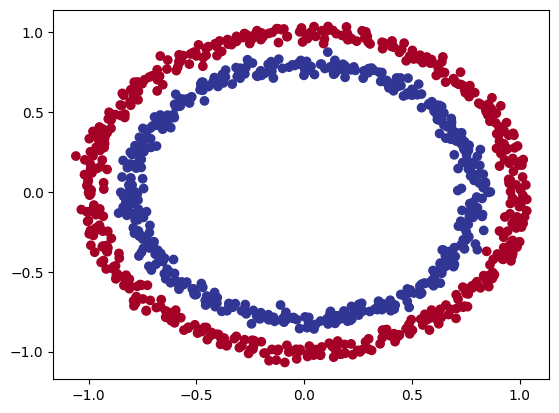

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 5.1774 - accuracy: 0.5075
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4.9870 - accuracy: 0.5063
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 4.9180 - accuracy: 0.5025
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 4.8428 - accuracy: 0.5025
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 4.6298 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 4.3496 - accuracy: 0.5125
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2624 - accuracy: 0.5175
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1945 - accuracy: 0.5163
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1274 - accuracy: 0.5125
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0539 - accuracy: 0.5125
Epoch 11/

[0.6955521106719971, 0.5149999856948853]

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 10ms/step - loss: 5.8848 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.8670 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.8647 - accuracy: 0.4870
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.8613 - accuracy: 0.4870
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.8592 - accuracy: 0.4870


In [13]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 3.2682 - accuracy: 0.4810


[3.2682433128356934, 0.48100000619888306]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improve our model

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5080


[0.702659010887146, 0.5080000162124634]

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


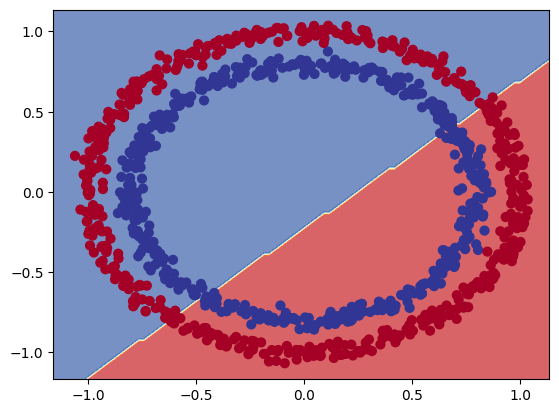

In [21]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 514.2853 - mae: 514.2853
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 389.1172 - mae: 389.1172
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 270.3197 - mae: 270.3197
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 148.5234 - mae: 148.5234
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 52.4154 - mae: 52.4154
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 88.3278 - mae: 88.3278
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 83.3045 - mae: 83.3045
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 49.8537 - mae: 49.8537
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 50.3553 - mae: 50.3553
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.5289 - mae: 46.5289
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


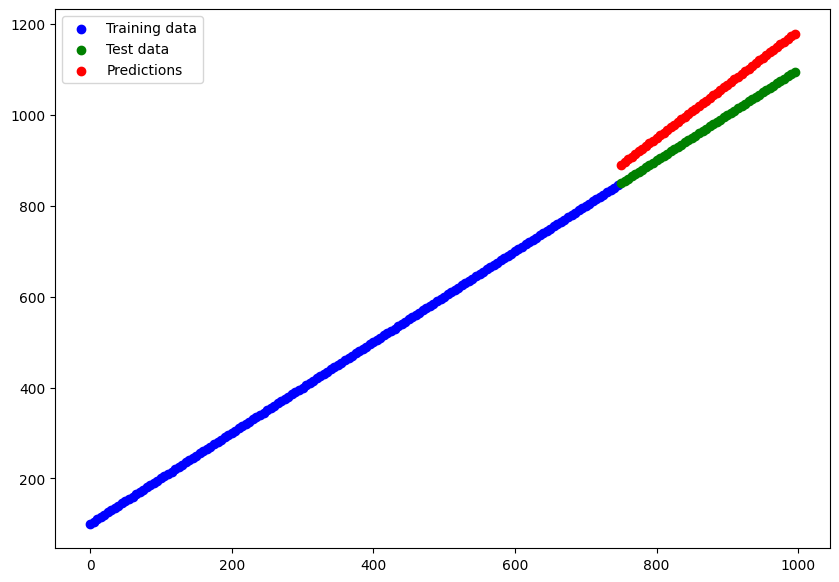

In [24]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0889 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0752 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0631 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0387 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0364 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0347 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0324 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0306 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0190 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0169 - accuracy: 0.4890
Epoch 11/

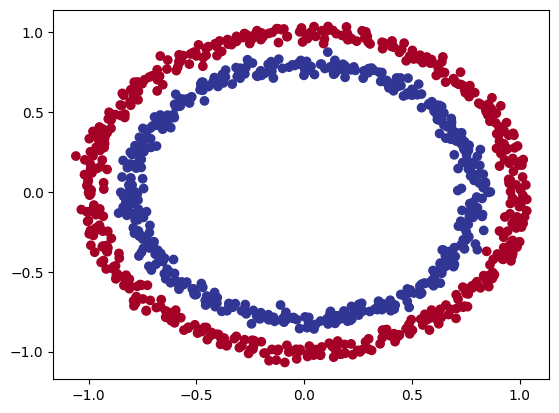

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


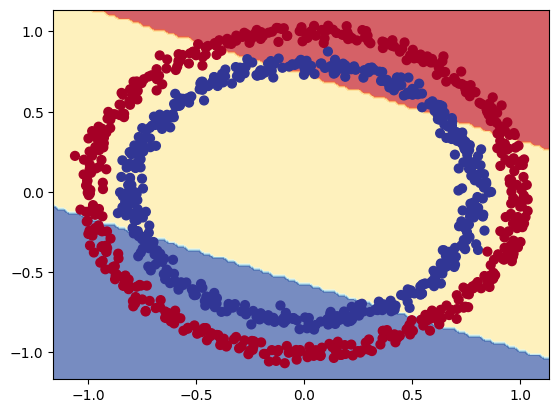

In [28]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [29]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.4761 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.4662 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.4631 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4628 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4626 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.4625 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4534 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4517 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4470 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4445 - accuracy: 0.4860
Epoch 11/